2.6장 타이타닉 생존자 예측 with 사이킷런

In [1]:
#. 파일을 df파일로 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 차트와 그래프 시각화 패키지
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('/Users/bluecloud/Documents/대학/유런/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# info()로 데이터 칼럼 타입 확인 
print('\n ##학습 데이터 정보##\n')
print(titanic_df.info())


 ##학습 데이터 정보##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
# null 값 처리 > fillna() Age는 평균나이로, 나머지는 N값으로
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수 :',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 : 0


/var/folders/2c/j3wmswps2r5gclvj1skrczqh0000gn/T/ipykernel_66880/423252097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)


In [13]:
# 문자열 피처들의 값 분류 살펴보기
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [15]:
# cabin은 객실의 등급만 필요하므로 앞 문자만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


<Axes: xlabel='Sex', ylabel='Survived'>

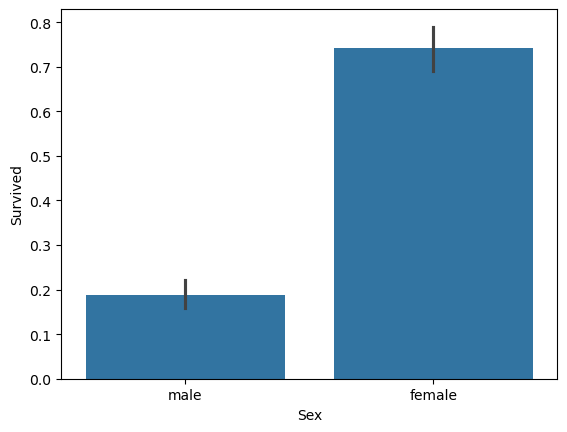

In [19]:
#case : 성별 > 성별에 따른 생존 시각화
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

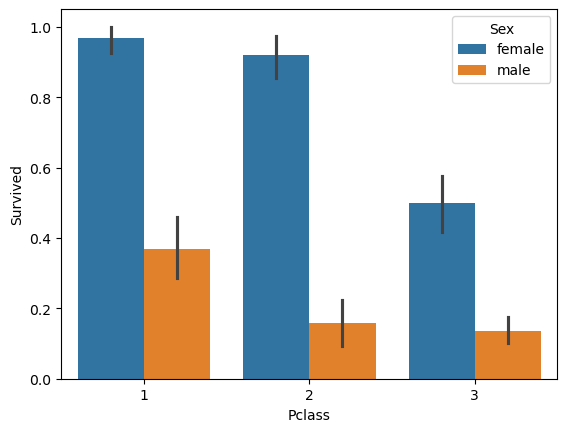

In [21]:
# case : 성별과 객실에 따른 생존 확률, hue 파라미터 추가해 성별을 입력값으로
sns.barplot(x='Pclass',hue='Sex',y='Survived',data=titanic_df)

여성의 경우 일,이등실의 생존률 차이는 적다 but 삼등실의 경우 많이 떨어진다
남성 > 일등실의 생존률이 월등히 높다

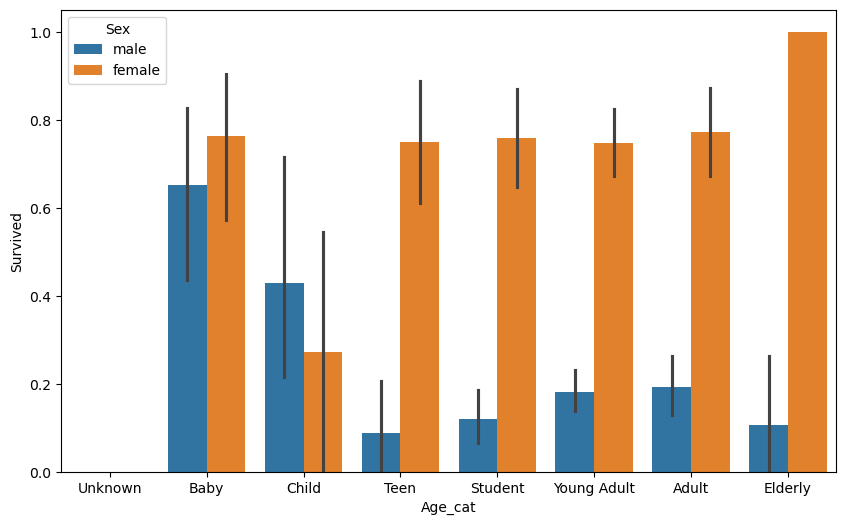

In [29]:
#case : age에 따른 생존률, age에 따라 나잇대 설정
def get_category(age):
    cat=''
    if age<=-1:cat='Unknown'
    elif age<=5:cat='Baby'
    elif age<=12:cat='Child'
    elif age<=18:cat='Teen'
    elif age<=25:cat='Student'
    elif age<=35:cat='Young Adult'
    elif age<=60:cat='Adult'
    else:cat='Elderly'
    return cat
# 막대그래프의 크기를 더 크게
# x축의 값 순차적으로 표시하기 위한 배열
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teen','Student','Young Adult','Adult','Elderly']

# get_category로 입력값으로 Age 칼럼값 받아 해당하는 cat 반환, cat값을 또다른 피처데이터로
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',hue='Sex',y='Survived',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

여자 Baby의 생존율 높고, Child 낮고, Elderly 높고 >> 성별, 나이, 선실등급이 생존에 중요한 피처

In [35]:
# 레이블 인코딩
# 문자열 카테고리를 숫자형 카테고리 피처로 변환 : LabeEncoding 객체 활용
from sklearn import preprocessing
def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF
titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [55]:
from sklearn.preprocessing import LabelEncoder
# 재사용 가능한 데이터 전처리 함수 
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
    
# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
    
# 레이블 인코딩 함수
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [57]:
# 원본 데이터 재로딩하여 피처/레이블 데이터 세트 추출 > Survived 속성만 별도로 분리헤 결정값 데이터 세트로
titanic_df=pd.read_csv('/Users/bluecloud/Documents/대학/유런/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

/var/folders/2c/j3wmswps2r5gclvj1skrczqh0000gn/T/ipykernel_66880/1516350451.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
/var/folders/2c/j3wmswps2r5gclvj1skrczqh0000gn/T/ipykernel_66880/1516350451.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

# 예측 성능 평가는 정확도로 > accuracy_score() API 사용

In [61]:
# 테스트 데이터 추출
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2, random_state=11)
# 예측 성능 평가는 정확도로 > accuracy_score() API 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정 트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

#DecisionTreeClassifier 학습 예측 평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습 예측 평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습 예측 평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 예측 성능 평가는 교차검증 > model_selection 패키지의 KFold, cross_val_score(), GridSearchCV 클래스 사용

In [69]:
#KFold 검증, 폴드 개수 5개 > 각 폴드의 정확도 및 평균 정확도
from sklearn.model_selection import KFold

# 폴드 세트 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
def exec_kfold(clf,folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]
    #KFold 교차 검증 수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train,X_tets=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_tets=y_titanic_df.values[train_index],y_titanic_df.values[test_index]\
        #Classifier 학습 예측 정확도 계산
        clf.fit(X_train,y_train)
        predicitons=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predicitons)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
    # 5개의 fold에서의 평균 정확도 계산
    mean_score=np.mean(scores)
    print("평균 정확도 :{0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.9497
교차 검증 1 정확도 : 0.9777
교차 검증 2 정확도 : 0.9497
교차 검증 3 정확도 : 0.9441
교차 검증 4 정확도 : 0.9721
평균 정확도 :0.9587


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [77]:
# cross_val_score() API를 활용한 교차검증
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도:{1:.4f}".format(iter_count,accuracy))
print("평균 정확도 :{0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도:0.7430
교차 검증 1 정확도:0.7753
교차 검증 2 정확도:0.7921
교차 검증 3 정확도:0.7865
교차 검증 4 정확도:0.8427
평균 정확도 :0.7879


In [79]:
#GridSearchCv로 DecisionTreeClassifier의 최적의 하이퍼 파라미터를 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCv의 최적의 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


3.6 피마 인디언 당뇨병 예측

In [83]:
# 데이터 로딩 후 Outcome 클래스 결정값의 분포와 데이터 확인
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('/Users/bluecloud/Documents/대학/유런/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [85]:
# feature의 타입과 Null 개수 살펴보기
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 null 값은 없으며, 모든 피쳐 타입이 숫자형 >> 피처 인코딩 필요 없음

데이터 세트를 피처 데이터와 클래스 데이터 세트로 나누고 학습 데이터와 테스트 데이터로 분리
 로지스틱 회귀로 예측 수행하고 성능 평가 지표 출력

In [129]:
# 평가지표 출력하는 함수 설정
def get_clf_eval3(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬:\n', confusion)
    print('정확도: {0:.4f},정밀도: {1:.4f},재현율: {2:.4f},F1: {3:.4f}AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
    
# Precision-Recall Curve Plot 그리기
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [131]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임, 칼럼 위치 -1을 이용해 추출
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval3(y_test,pred,pred_proba)

오차행렬:
 [[83 14]
 [25 32]]
정확도: 0.7468,정밀도: 0.6957,재현율: 0.5614,F1: 0.6214AUC: 0.8300


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 전체 데이터의 65%가 Negative이므로 재현율 성능에 초점

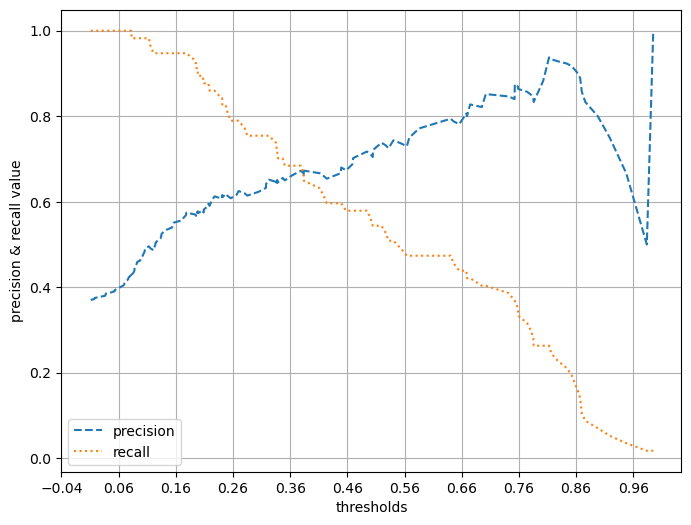

In [107]:
# 임곗값별 정밀도와 재현율 곡선
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

>> 임계값을 0.42정도로 맞추면 정밀도와 재현율 균형 맞출듯

In [113]:
# 원본 데이터의 피처 값 분포도 살펴보기
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 min 값이 0인 부분이 상당히 많음
 min() 값이 0으로 되어있는 피처 중 0 값의 건수 및 데이터건수 대비 및 퍼센트 비율로 존재하는지 확인해보기

In [115]:
# 0값을 검사할 피처 명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
# 전체 데이터 건수
total_count=diabetes_data['Glucose'].count()
#피처별로 반복하면서 데이터값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [117]:
#SkinThickness, Insulin의 0값은 꽤 높음 >> 피처의 0값을 평균값으로 대체하기
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [119]:
# 0값을 평균값으로 대체한 세트에 피처 스케일링 적용해 변환
# 다시 데이터 나누고 회귀 적용
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

# StandardScaler 클래스 이용해 스캐일링 적용
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156)

# 로지스틱 회귀로 학습 예측 및 평가 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval3(y_test,pred,pred_proba)

오차행렬:
 [[83 14]
 [25 32]]
정확도: 0.7468,정밀도: 0.6957,재현율: 0.5614,F1: 0.6214AUC: 0.8300


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
from sklearn.preprocessing import Binarizer
# 평가지표 출력하는 함수 설정
def get_clf_eval2(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
 # 임곗값을 변화시키며 성능 수치 판단하기
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval2(y_test, custom_predict)
        
thresholds=[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)


임계값:  0.3
오차행렬:
 [[73 24]
 [16 41]]

정확도: 0.7403
정밀도: 0.6308
재현율: 0.7193
F1: 0.6721
AUC: 0.7359

임계값:  0.33
오차행렬:
 [[74 23]
 [18 39]]

정확도: 0.7338
정밀도: 0.6290
재현율: 0.6842
F1: 0.6555
AUC: 0.7235

임계값:  0.36
오차행렬:
 [[75 22]
 [20 37]]

정확도: 0.7273
정밀도: 0.6271
재현율: 0.6491
F1: 0.6379
AUC: 0.7112

임계값:  0.39
오차행렬:
 [[79 18]
 [21 36]]

정확도: 0.7468
정밀도: 0.6667
재현율: 0.6316
F1: 0.6486
AUC: 0.7230

임계값:  0.42
오차행렬:
 [[79 18]
 [24 33]]

정확도: 0.7273
정밀도: 0.6471
재현율: 0.5789
F1: 0.6111
AUC: 0.6967

임계값:  0.45
오차행렬:
 [[81 16]
 [25 32]]

정확도: 0.7338
정밀도: 0.6667
재현율: 0.5614
F1: 0.6095
AUC: 0.6982

임계값:  0.48
오차행렬:
 [[83 14]
 [25 32]]

정확도: 0.7468
정밀도: 0.6957
재현율: 0.5614
F1: 0.6214
AUC: 0.7085

임계값:  0.5
오차행렬:
 [[83 14]
 [25 32]]

정확도: 0.7468
정밀도: 0.6957
재현율: 0.5614
F1: 0.6214
AUC: 0.7085


 임곗값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시킴

In [138]:
# 임곗값이 0.48로 낮춘 상태에서 예측 클래스 값 구하기
binarizer=Binarizer(threshold=0.48)
# 위에서 구한 Ir_clf의 predict_proba() 에측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval3(y_test,pred_th_048,pred_proba[:,1])

오차행렬:
 [[83 14]
 [25 32]]
정확도: 0.7468,정밀도: 0.6957,재현율: 0.5614,F1: 0.6214AUC: 0.8300
